In [6]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📂 Load CSVs (update the folder path if needed)
folder = "C:/Users/gf/Downloads/NHANES_SELECTED_dataset"

demo = pd.read_csv(os.path.join(folder, "DEMO1csv.csv"))
bmx = pd.read_csv(os.path.join(folder, "BMX_Lcsv.csv"))
glu = pd.read_csv(os.path.join(folder, "GLU_Lcsv.csv"))
ghb = pd.read_csv(os.path.join(folder, "GHB_Lcsv.csv"))  # HbA1c
ins = pd.read_csv(os.path.join(folder, "INS_Lcsv.csv"))
diq = pd.read_csv(os.path.join(folder, "DIQ_Lcsv.csv"))
paq = pd.read_csv(os.path.join(folder, "PAQ_Lcsv.csv"))
diet = pd.read_csv(os.path.join(folder, "DR1TOT_Lcsv.csv"))

# 🔗 Merge datasets on SEQN (participant ID)
df = demo.merge(bmx, on="SEQN", how="inner") \
         .merge(glu, on="SEQN", how="inner") \
         .merge(ghb, on="SEQN", how="inner") \
         .merge(ins, on="SEQN", how="inner") \
         .merge(diq, on="SEQN", how="inner") \
         .merge(paq, on="SEQN", how="inner") \
         .merge(diet, on="SEQN", how="inner")

print(f"✅ Merged dataset shape: {df.shape}")

# 🎯 Create target variable: 1 if diabetes reported or HbA1c ≥ 6.5%
df['target'] = ((df['DIQ010'] == 1) | (df['LBXGH'] >= 6.5)).astype(int)

# ✅ Update column names as per availability
features = [
    'RIDAGEYR', 'RIAGENDR', 'RIDRETH1',     # Demographics
    'BMXBMI', 'BMXWAIST',                   # Body measurements
    'LBXGLU', 'LBXGH', 'LBXIN',             # Lab values
    'DR1TKCAL', 'DR1TPROT', 'DR1TSUGR', 'DR1TTFAT',  # Diet
    'PAD680', 'PAD800', 'PAD820',           # Activity
    'target'                                # Label
]

# Filter the dataset
df = df[features]

# 🧼 Handle missing values with median imputation
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 🔡 Encode categorical variables
df_imputed['RIAGENDR'] = df_imputed['RIAGENDR'].replace({1: 'Male', 2: 'Female'})
df_encoded = pd.get_dummies(df_imputed, columns=['RIAGENDR', 'RIDRETH1'], drop_first=True)

# 🔃 Normalize features
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split for model training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# ✅ Combine and save to CSV
processed_df = X_scaled.copy()
processed_df['target'] = y.values
processed_df.to_csv("processed_nhanes_diabetes_2021_2022.csv", index=False)

print("🎉 Processing complete. File saved as: processed_nhanes_diabetes_2021_2022.csv")


✅ Merged dataset shape: (3562, 239)
🎉 Processing complete. File saved as: processed_nhanes_diabetes_2021_2022.csv


In [9]:
#✅ Full Code: Merge + Preprocess + Visualize + Save

In [10]:
#What’s New in This Version:
#EDA with:
#✅ Count plot of diabetes distribution
#✅ Histograms of all features
#✅ Correlation heatmap

✅ Merged dataset shape: (3562, 239)


C:\Users\gf\AppData\Local\Temp\ipykernel_21136\4210946197.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded, x='target', palette='Set2')
C:\Users\gf\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


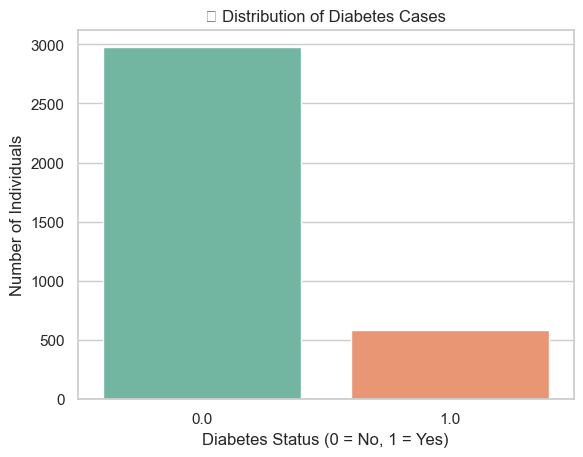

C:\Users\gf\AppData\Local\Temp\ipykernel_21136\4210946197.py:68: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gf\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


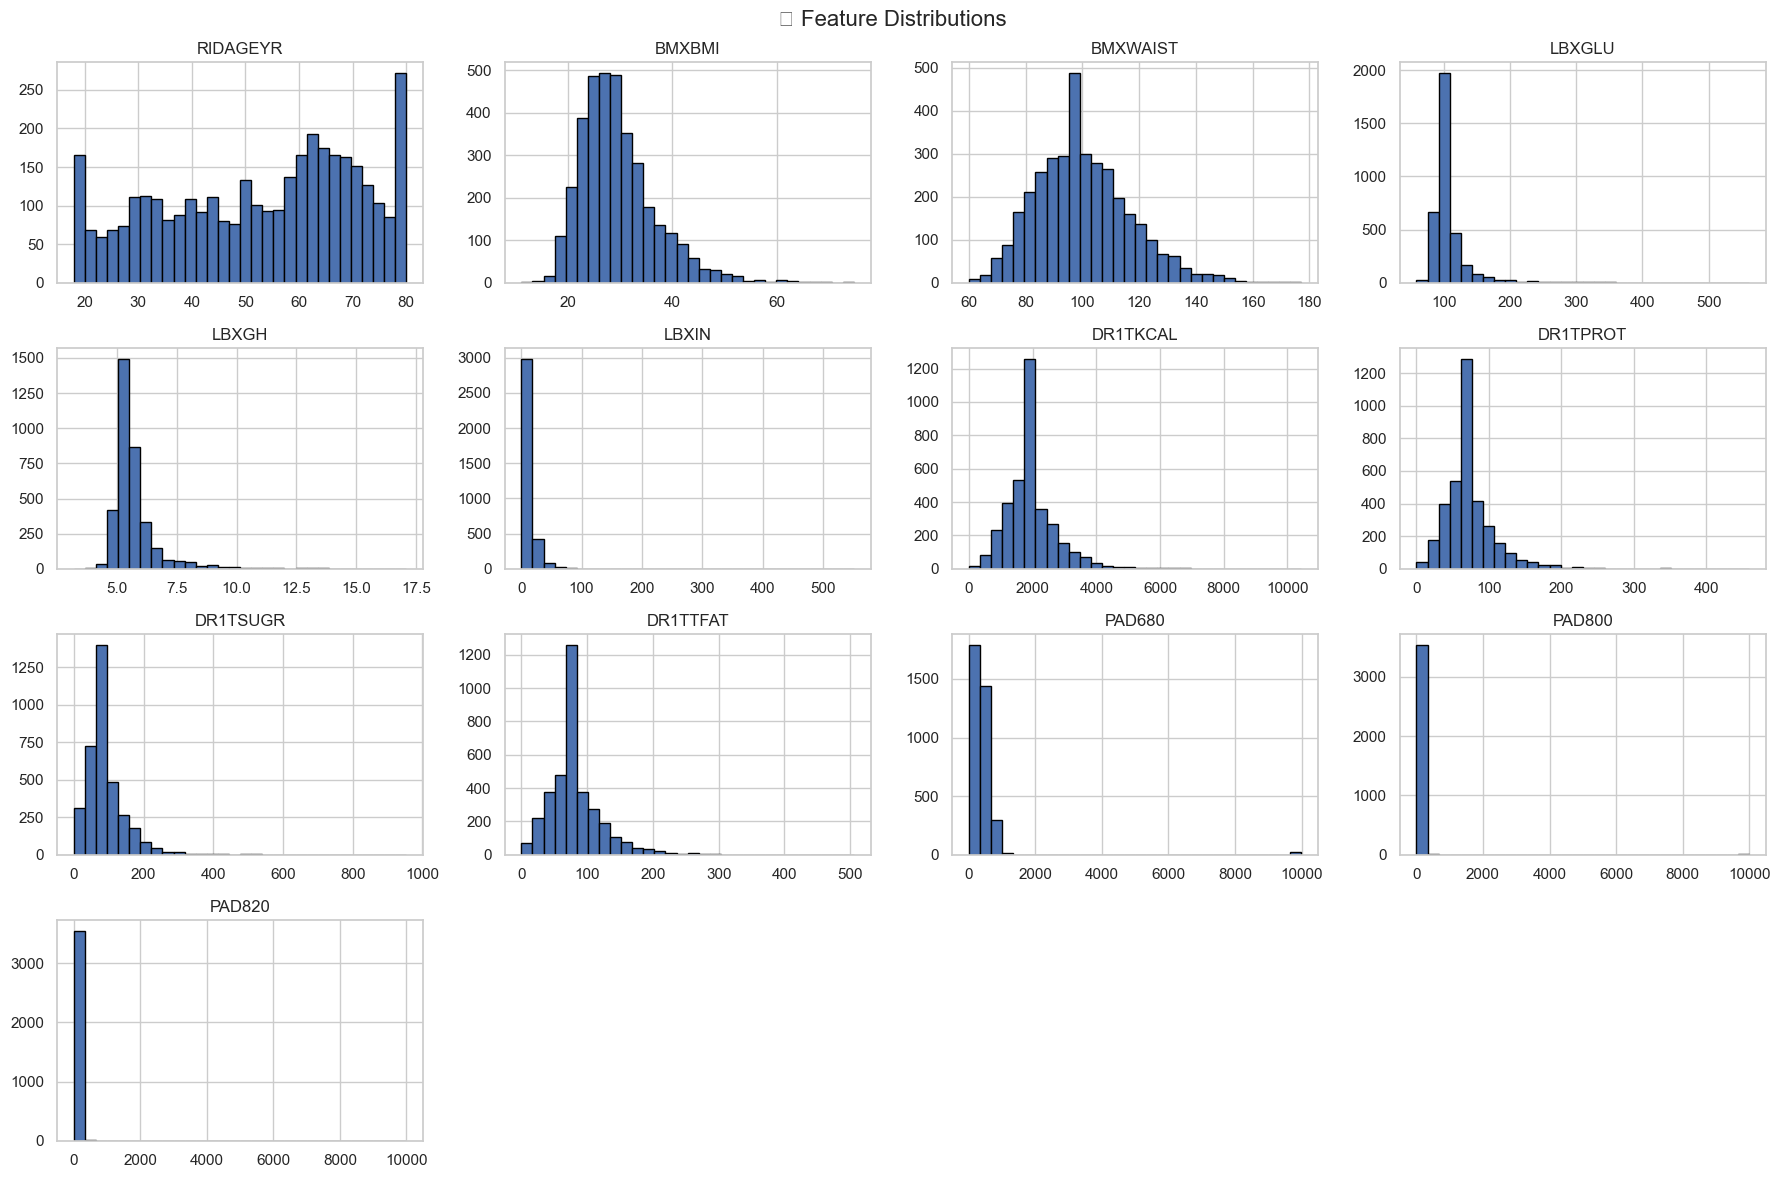

C:\Users\gf\AppData\Local\Temp\ipykernel_21136\4210946197.py:75: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gf\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


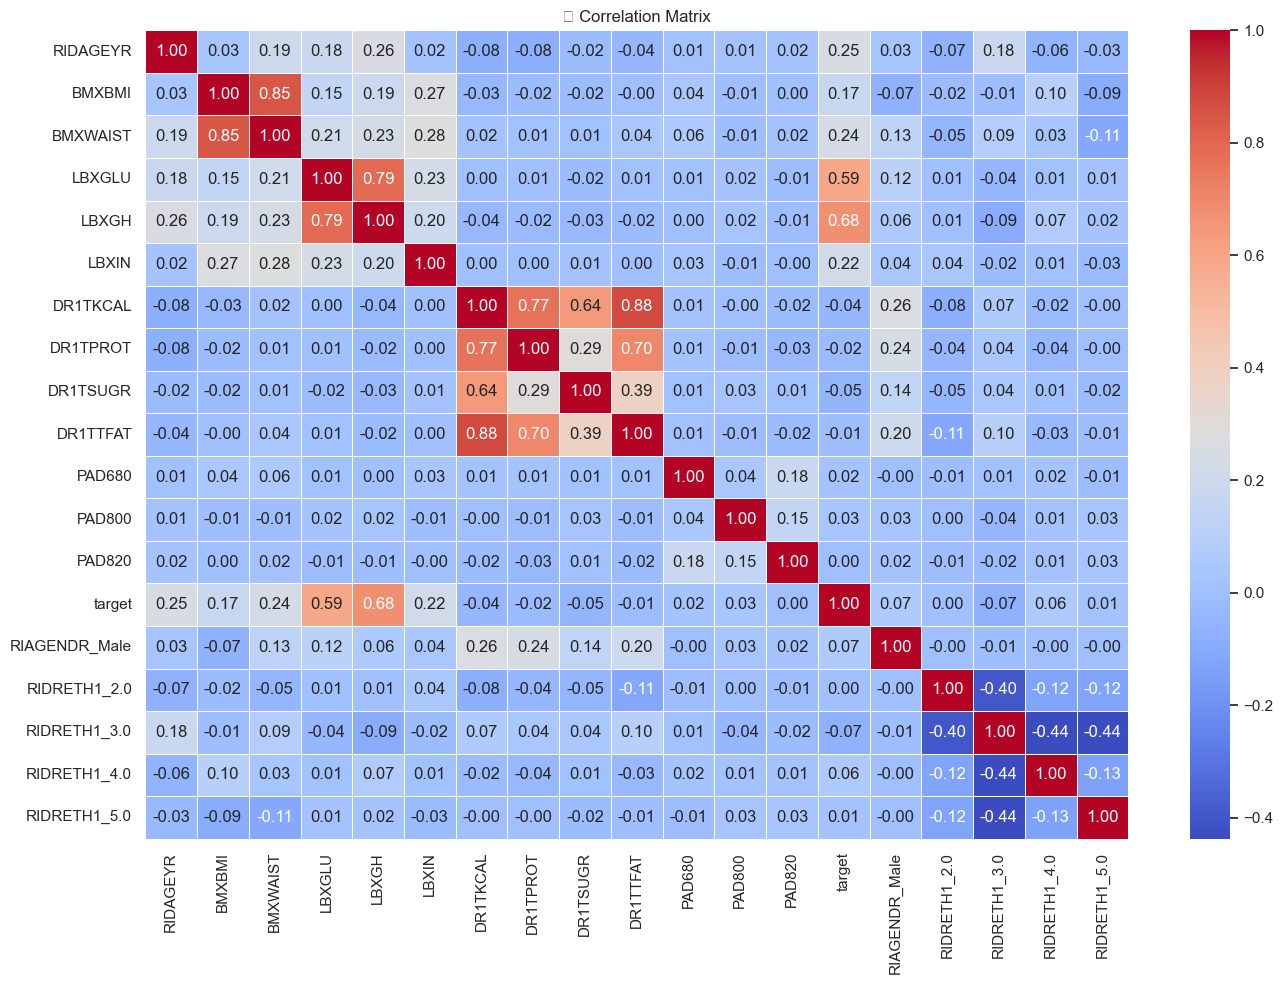

🎉 All steps complete. Data saved as: processed_nhanes_diabetes_2021_2022.csv


In [7]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")  # prettier plots

# 📂 Load CSVs (update the folder path if needed)
folder = "C:/Users/gf/Downloads/NHANES_SELECTED_dataset"

demo = pd.read_csv(os.path.join(folder, "DEMO1csv.csv"))
bmx = pd.read_csv(os.path.join(folder, "BMX_Lcsv.csv"))
glu = pd.read_csv(os.path.join(folder, "GLU_Lcsv.csv"))
ghb = pd.read_csv(os.path.join(folder, "GHB_Lcsv.csv"))  # HbA1c
ins = pd.read_csv(os.path.join(folder, "INS_Lcsv.csv"))
diq = pd.read_csv(os.path.join(folder, "DIQ_Lcsv.csv"))
paq = pd.read_csv(os.path.join(folder, "PAQ_Lcsv.csv"))
diet = pd.read_csv(os.path.join(folder, "DR1TOT_Lcsv.csv"))

# 🔗 Merge datasets on SEQN (participant ID)
df = demo.merge(bmx, on="SEQN", how="inner") \
         .merge(glu, on="SEQN", how="inner") \
         .merge(ghb, on="SEQN", how="inner") \
         .merge(ins, on="SEQN", how="inner") \
         .merge(diq, on="SEQN", how="inner") \
         .merge(paq, on="SEQN", how="inner") \
         .merge(diet, on="SEQN", how="inner")

print(f"✅ Merged dataset shape: {df.shape}")

# 🎯 Create target variable: 1 if diabetes reported or HbA1c ≥ 6.5%
df['target'] = ((df['DIQ010'] == 1) | (df['LBXGH'] >= 6.5)).astype(int)

# ✅ Select relevant columns
features = [
    'RIDAGEYR', 'RIAGENDR', 'RIDRETH1',     # Demographics
    'BMXBMI', 'BMXWAIST',                   # Body measurements
    'LBXGLU', 'LBXGH', 'LBXIN',             # Lab values
    'DR1TKCAL', 'DR1TPROT', 'DR1TSUGR', 'DR1TTFAT',  # Diet
    'PAD680', 'PAD800', 'PAD820',           # Activity
    'target'                                # Label
]
df = df[features]

# 🧼 Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 🔡 Encode categorical features
df_imputed['RIAGENDR'] = df_imputed['RIAGENDR'].replace({1: 'Male', 2: 'Female'})
df_encoded = pd.get_dummies(df_imputed, columns=['RIAGENDR', 'RIDRETH1'], drop_first=True)

# 🔍 EDA: Class balance
sns.countplot(data=df_encoded, x='target', palette='Set2')
plt.title("🎯 Distribution of Diabetes Cases")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Number of Individuals")
plt.show()

# 🔍 EDA: Histograms
df_encoded.drop(columns=["target"]).hist(bins=30, figsize=(18, 12), edgecolor='black')
plt.suptitle("📦 Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# 🔍 EDA: Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("🔗 Correlation Matrix")
plt.tight_layout()
plt.show()

# 🔃 Normalize numerical features
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 🔀 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# 💾 Save processed dataset
processed_df = X_scaled.copy()
processed_df['target'] = y.values
processed_df.to_csv("processed_nhanes_diabetes_2021_2022.csv", index=False)

print("🎉 All steps complete. Data saved as: processed_nhanes_diabetes_2021_2022.csv")


In [12]:
#Merge and clean data
#Explore and visualize
#Train 3 models
#Show classification reports and ROC curves
#Save the final dataset

In [15]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


✅ Merged dataset shape: (3562, 239)


C:\Users\gf\AppData\Local\Temp\ipykernel_16880\1119503413.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded, x='target', palette='Set2')
C:\Users\gf\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


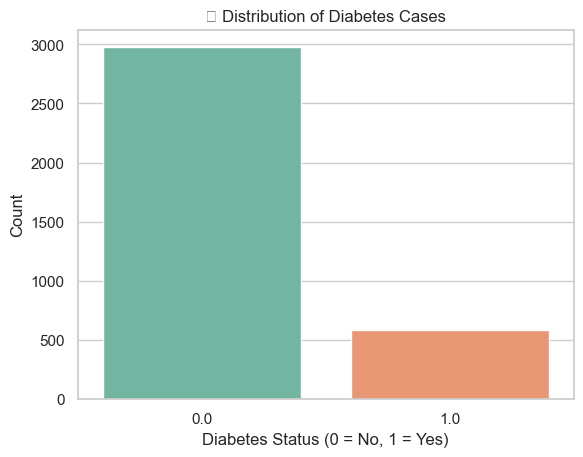

C:\Users\gf\AppData\Local\Temp\ipykernel_16880\1119503413.py:73: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gf\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


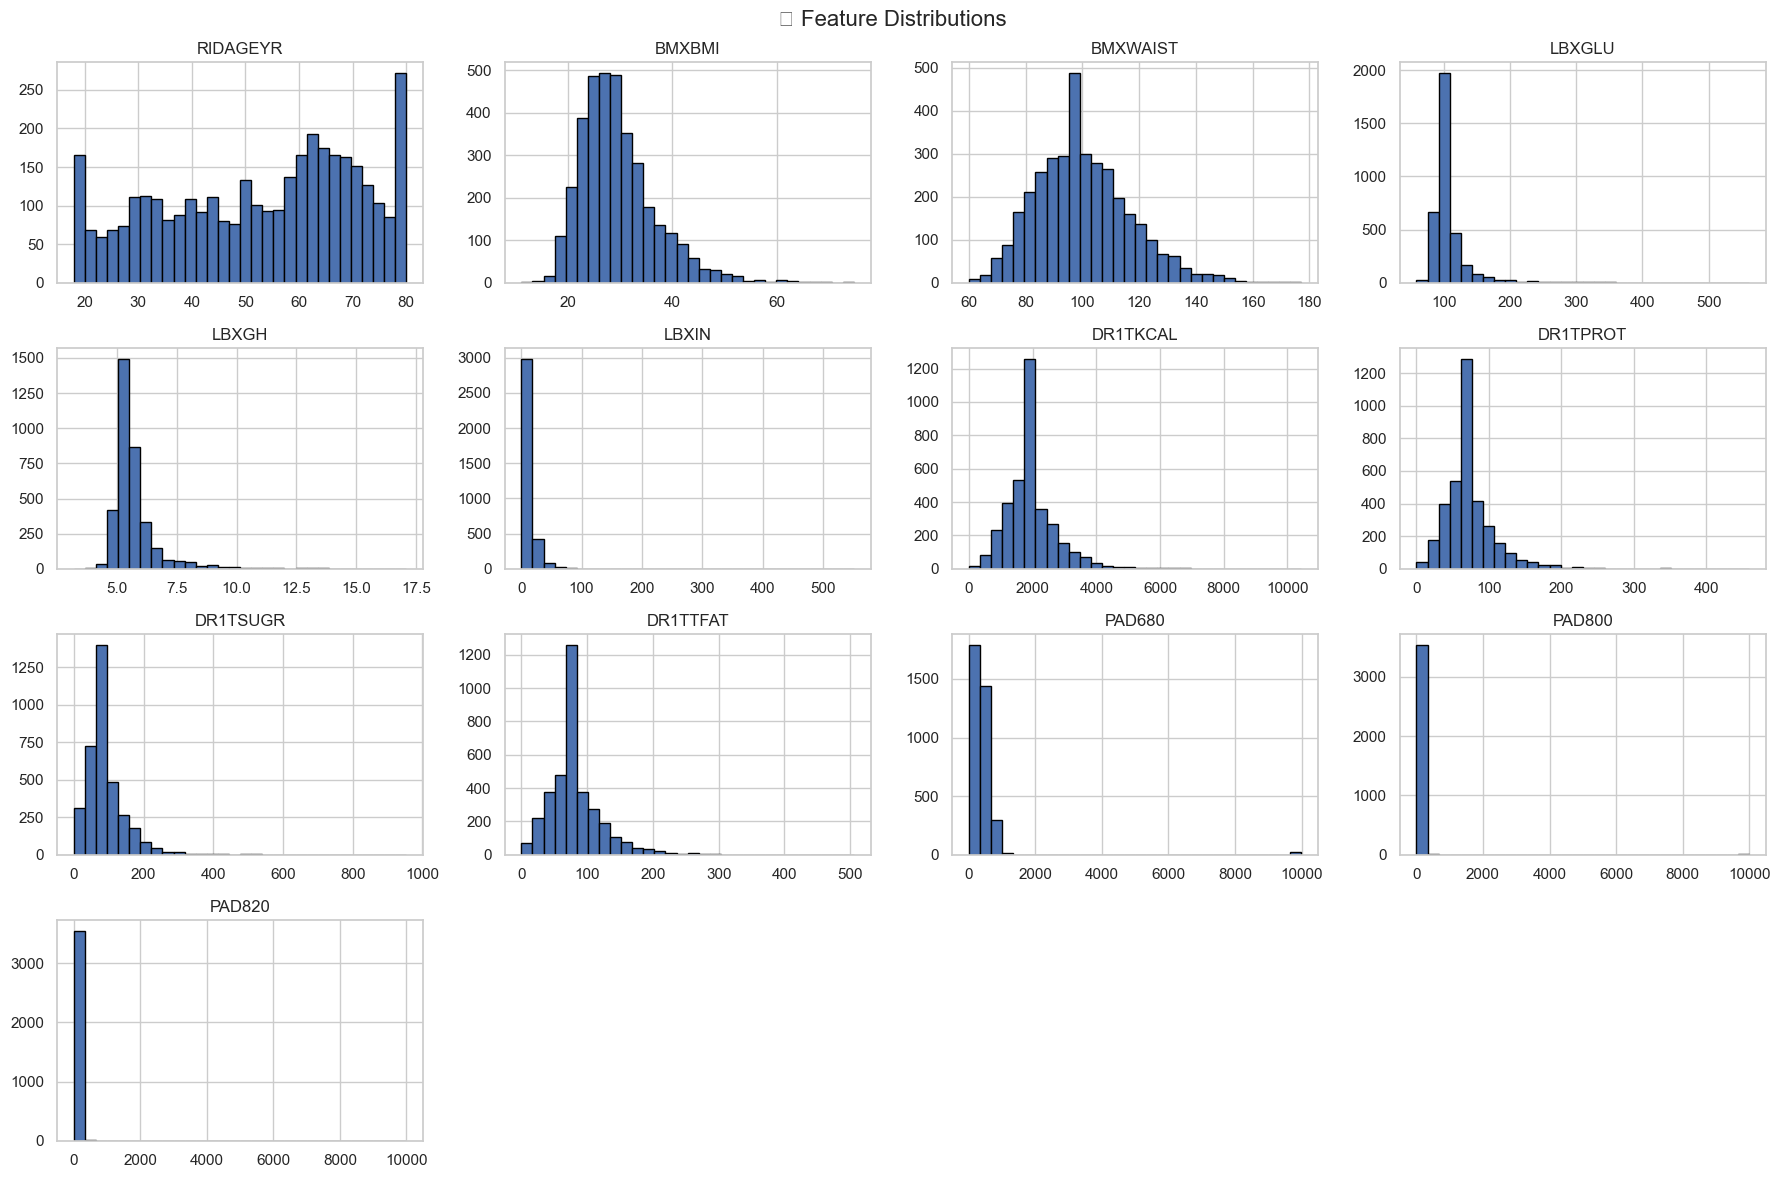

C:\Users\gf\AppData\Local\Temp\ipykernel_16880\1119503413.py:80: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gf\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


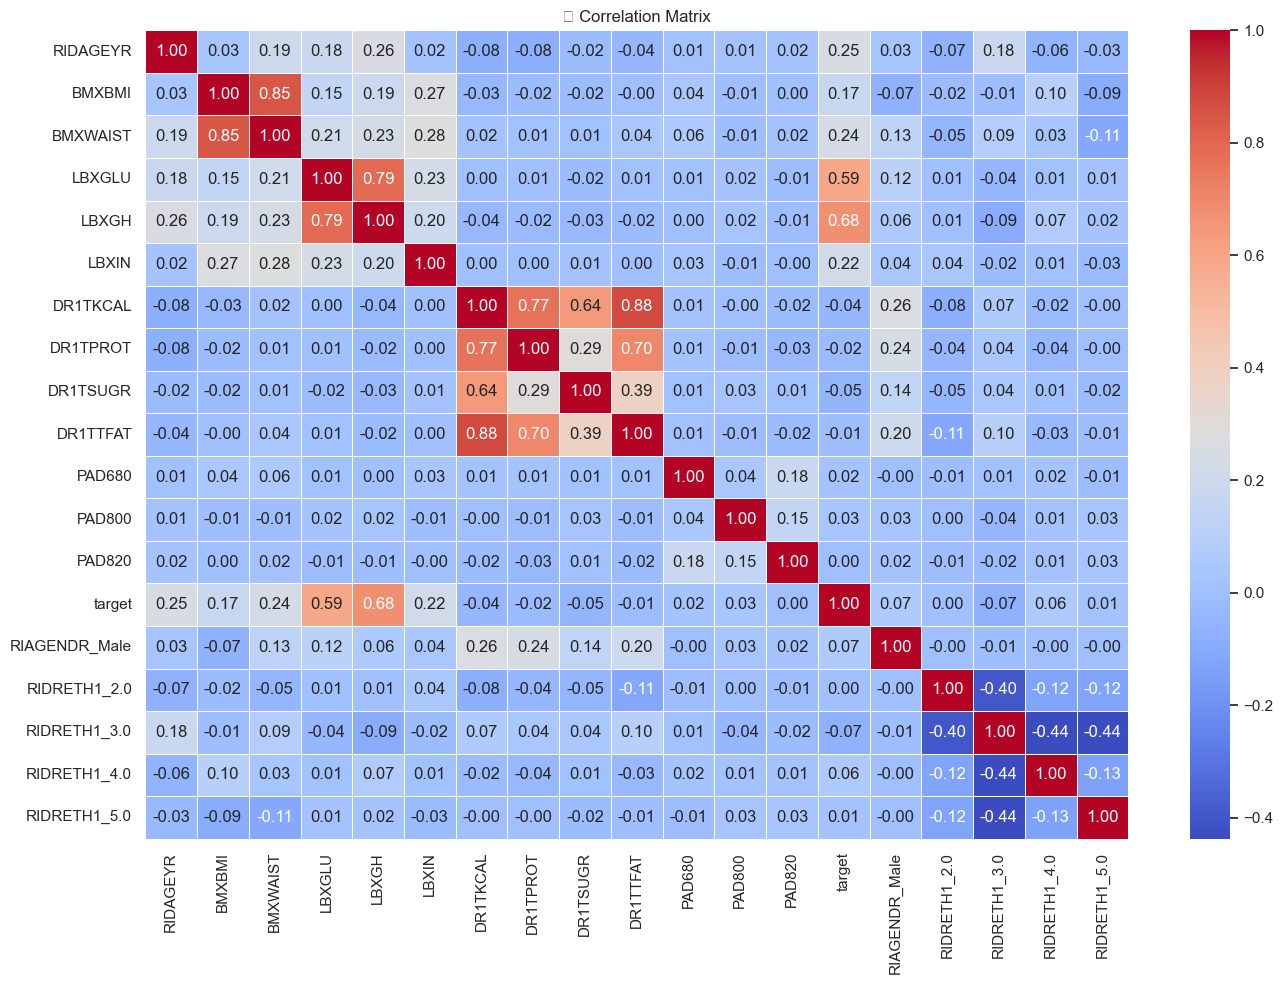


🔍 Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       596
         1.0       0.93      0.71      0.81       117

    accuracy                           0.94       713
   macro avg       0.94      0.85      0.89       713
weighted avg       0.94      0.94      0.94       713


🔍 Random Forest Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       596
         1.0       0.99      0.73      0.84       117

    accuracy                           0.95       713
   macro avg       0.97      0.86      0.91       713
weighted avg       0.96      0.95      0.95       713



C:\Users\gf\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:39:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       596
         1.0       0.94      0.71      0.81       117

    accuracy                           0.95       713
   macro avg       0.94      0.85      0.89       713
weighted avg       0.95      0.95      0.94       713



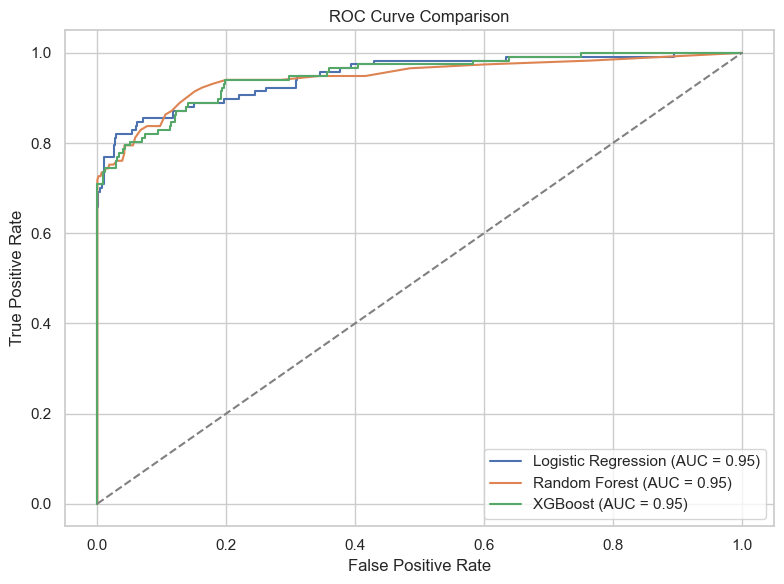

In [1]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")  # prettier plots

# 📂 Load CSVs (update the folder path if needed)
folder = "C:/Users/gf/Downloads/NHANES_SELECTED_dataset"

demo = pd.read_csv(os.path.join(folder, "DEMO1csv.csv"))
bmx = pd.read_csv(os.path.join(folder, "BMX_Lcsv.csv"))
glu = pd.read_csv(os.path.join(folder, "GLU_Lcsv.csv"))
ghb = pd.read_csv(os.path.join(folder, "GHB_Lcsv.csv"))  # HbA1c
ins = pd.read_csv(os.path.join(folder, "INS_Lcsv.csv"))
diq = pd.read_csv(os.path.join(folder, "DIQ_Lcsv.csv"))
paq = pd.read_csv(os.path.join(folder, "PAQ_Lcsv.csv"))
diet = pd.read_csv(os.path.join(folder, "DR1TOT_Lcsv.csv"))

# 🔗 Merge datasets on SEQN (participant ID)
df = demo.merge(bmx, on="SEQN", how="inner") \
         .merge(glu, on="SEQN", how="inner") \
         .merge(ghb, on="SEQN", how="inner") \
         .merge(ins, on="SEQN", how="inner") \
         .merge(diq, on="SEQN", how="inner") \
         .merge(paq, on="SEQN", how="inner") \
         .merge(diet, on="SEQN", how="inner")

print(f"✅ Merged dataset shape: {df.shape}")

# 🎯 Create target variable: 1 if diabetes reported or HbA1c ≥ 6.5%
df['target'] = ((df['DIQ010'] == 1) | (df['LBXGH'] >= 6.5)).astype(int)

# ✅ Select relevant columns
features = [
    'RIDAGEYR', 'RIAGENDR', 'RIDRETH1',
    'BMXBMI', 'BMXWAIST',
    'LBXGLU', 'LBXGH', 'LBXIN',
    'DR1TKCAL', 'DR1TPROT', 'DR1TSUGR', 'DR1TTFAT',
    'PAD680', 'PAD800', 'PAD820',
    'target'
]
df = df[features]

# 🧼 Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 🔡 Encode categorical features
df_imputed['RIAGENDR'] = df_imputed['RIAGENDR'].replace({1: 'Male', 2: 'Female'})
df_encoded = pd.get_dummies(df_imputed, columns=['RIAGENDR', 'RIDRETH1'], drop_first=True)

# 📊 EDA: Class balance
sns.countplot(data=df_encoded, x='target', palette='Set2')
plt.title("🎯 Distribution of Diabetes Cases")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 📊 Histograms
df_encoded.drop(columns=["target"]).hist(bins=30, figsize=(18, 12), edgecolor='black')
plt.suptitle("📦 Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# 📊 Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("🔗 Correlation Matrix")
plt.tight_layout()
plt.show()

# 🔃 Normalize and split
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# ✅ Save cleaned data
processed_df = X_scaled.copy()
processed_df['target'] = y.values
processed_df.to_csv("processed_nhanes_diabetes_2021_2022.csv", index=False)

# 🤖 Train & evaluate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n🔍 {name} Report:")
    print(classification_report(y_test, preds))

# 📈 ROC Curve Comparison
plt.figure(figsize=(8, 6))
for model, label in zip(models.values(), models.keys()):
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


✅ Merged dataset shape: (3562, 239)


C:\Users\gf\AppData\Local\Temp\ipykernel_16880\3267505973.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded, x='target', palette='Set2')
C:\Users\gf\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


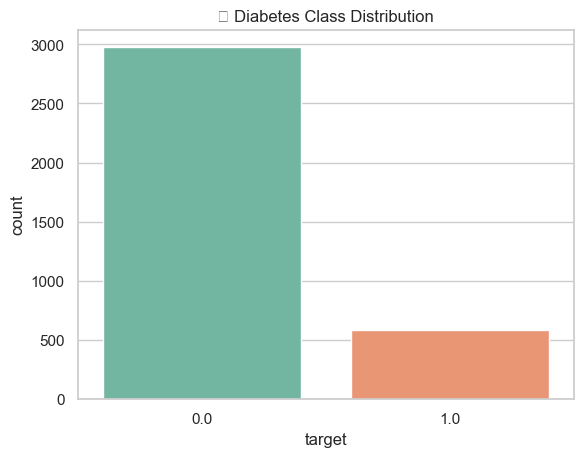

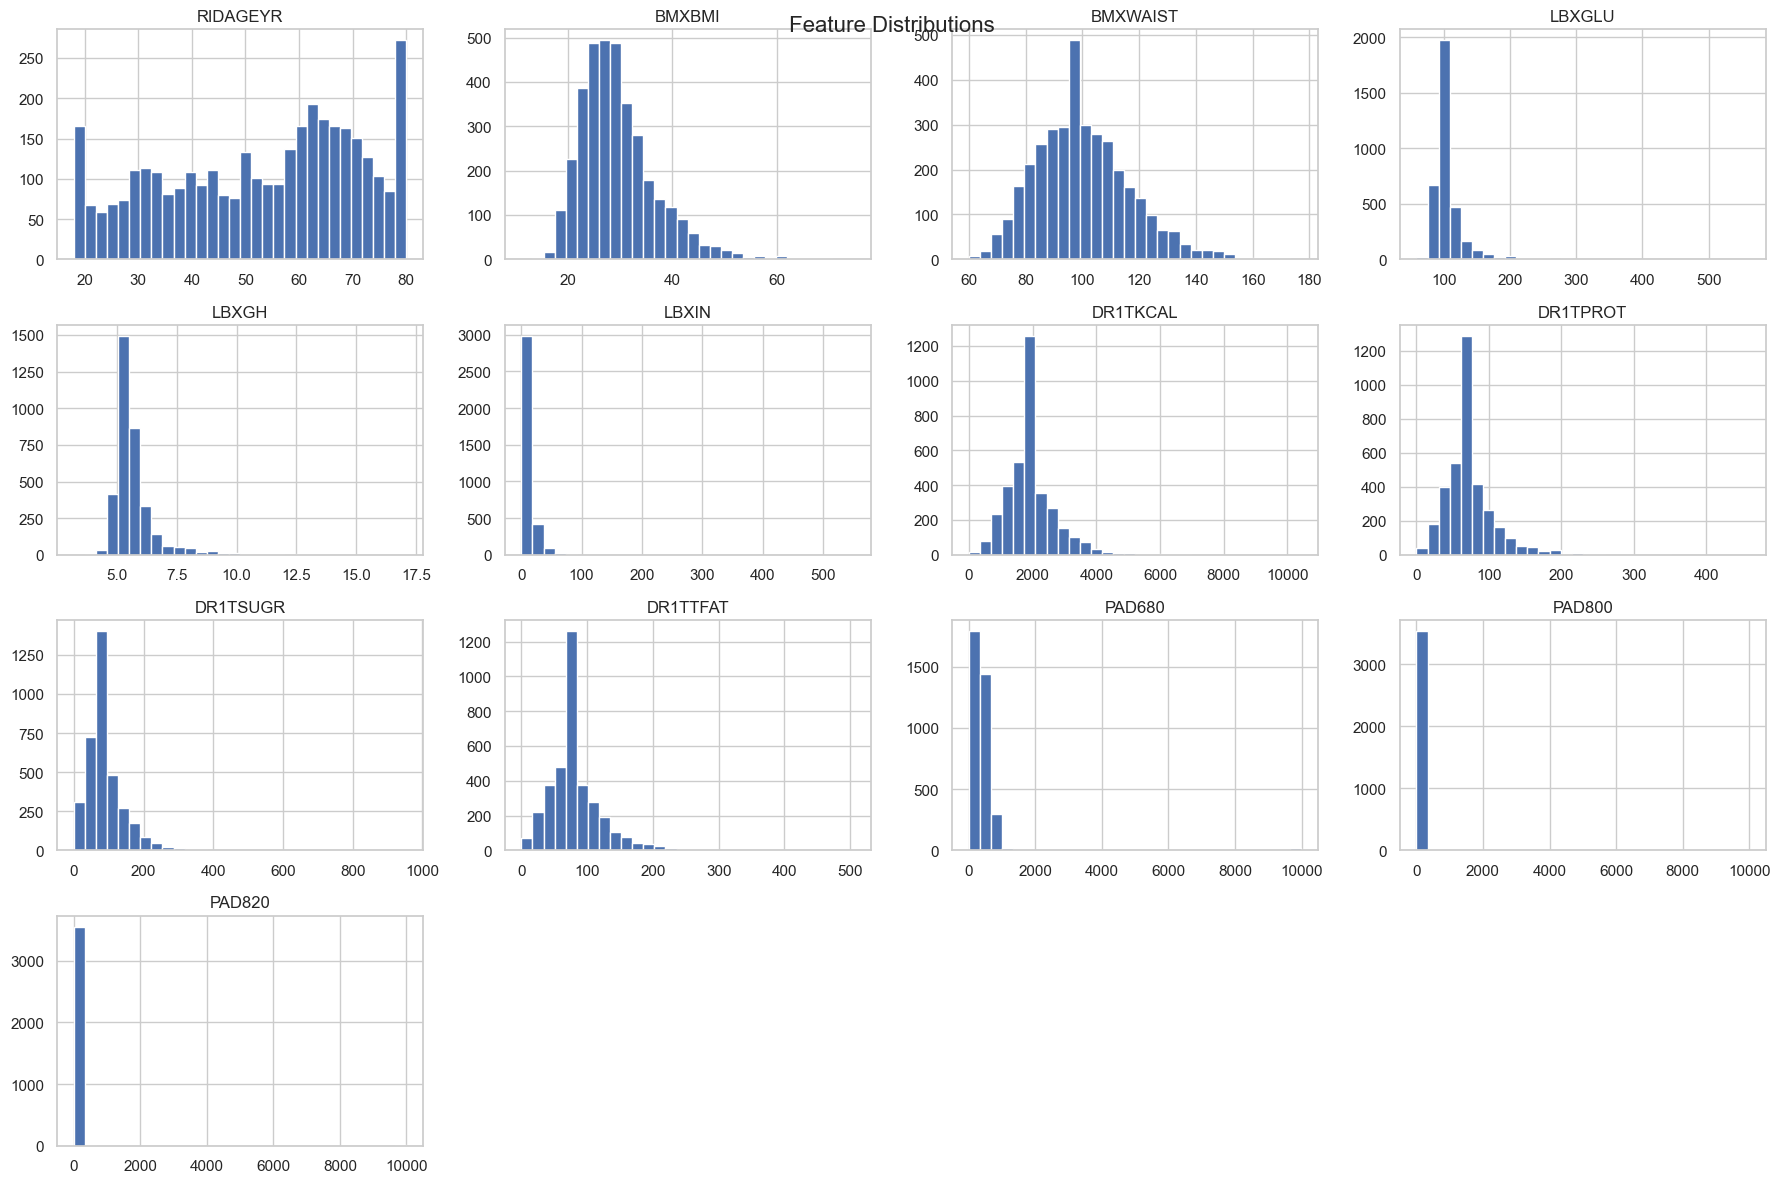

C:\Users\gf\AppData\Local\Temp\ipykernel_16880\3267505973.py:80: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gf\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


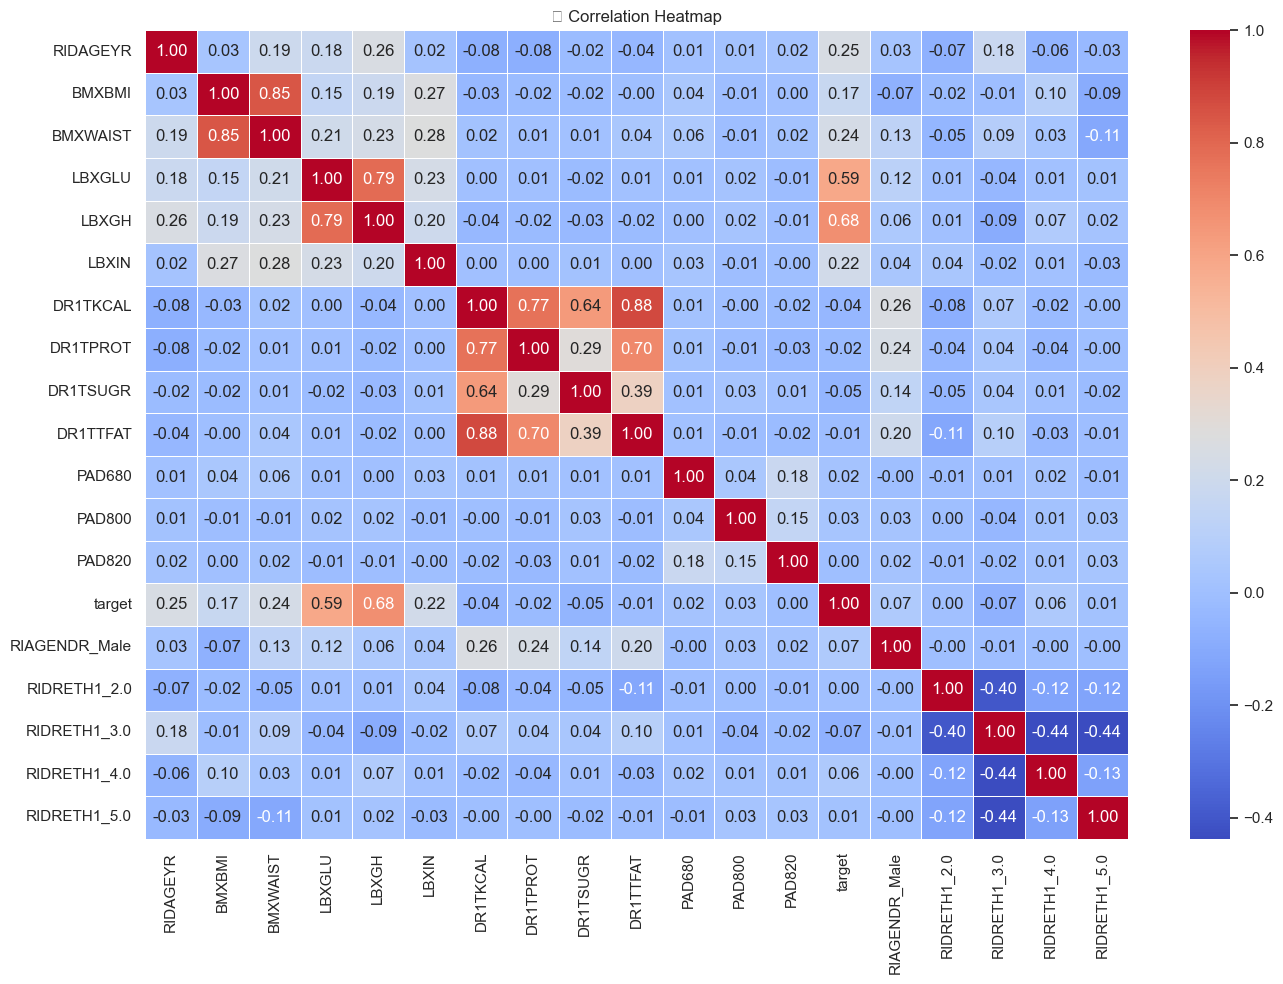

✅ Processed dataset saved.

🔍 Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       596
         1.0       0.93      0.71      0.81       117

    accuracy                           0.94       713
   macro avg       0.94      0.85      0.89       713
weighted avg       0.94      0.94      0.94       713


🔍 Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       596
         1.0       0.99      0.73      0.84       117

    accuracy                           0.95       713
   macro avg       0.97      0.86      0.91       713
weighted avg       0.96      0.95      0.95       713



C:\Users\gf\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:53:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       596
         1.0       0.94      0.71      0.81       117

    accuracy                           0.95       713
   macro avg       0.94      0.85      0.89       713
weighted avg       0.95      0.95      0.94       713



C:\Users\gf\AppData\Local\Temp\ipykernel_16880\3267505973.py:125: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gf\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


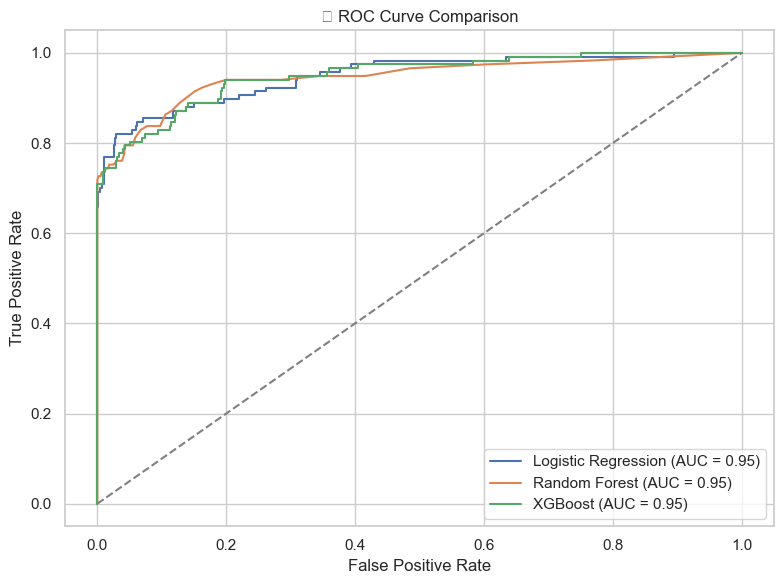

✅ Models saved as .pkl files


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [5]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import shap

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

sns.set(style="whitegrid")

# 📂 Load CSVs (update your actual folder path here)
folder = "C:/Users/gf/Downloads/NHANES_SELECTED_dataset"

demo = pd.read_csv(os.path.join(folder, "DEMO1csv.csv"))
bmx = pd.read_csv(os.path.join(folder, "BMX_Lcsv.csv"))
glu = pd.read_csv(os.path.join(folder, "GLU_Lcsv.csv"))
ghb = pd.read_csv(os.path.join(folder, "GHB_Lcsv.csv"))  # HbA1c
ins = pd.read_csv(os.path.join(folder, "INS_Lcsv.csv"))
diq = pd.read_csv(os.path.join(folder, "DIQ_Lcsv.csv"))
paq = pd.read_csv(os.path.join(folder, "PAQ_Lcsv.csv"))
diet = pd.read_csv(os.path.join(folder, "DR1TOT_Lcsv.csv"))

# 🔗 Merge datasets on SEQN
df = demo.merge(bmx, on="SEQN", how="inner") \
         .merge(glu, on="SEQN", how="inner") \
         .merge(ghb, on="SEQN", how="inner") \
         .merge(ins, on="SEQN", how="inner") \
         .merge(diq, on="SEQN", how="inner") \
         .merge(paq, on="SEQN", how="inner") \
         .merge(diet, on="SEQN", how="inner")

print(f"✅ Merged dataset shape: {df.shape}")

# 🎯 Create target
df['target'] = ((df['DIQ010'] == 1) | (df['LBXGH'] >= 6.5)).astype(int)

# ✅ Select features
features = [
    'RIDAGEYR', 'RIAGENDR', 'RIDRETH1',
    'BMXBMI', 'BMXWAIST',
    'LBXGLU', 'LBXGH', 'LBXIN',
    'DR1TKCAL', 'DR1TPROT', 'DR1TSUGR', 'DR1TTFAT',
    'PAD680', 'PAD800', 'PAD820',
    'target'
]
df = df[features]

# 🧼 Impute missing
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 🔡 Encode categoricals
df_imputed['RIAGENDR'] = df_imputed['RIAGENDR'].replace({1: 'Male', 2: 'Female'})
df_encoded = pd.get_dummies(df_imputed, columns=['RIAGENDR', 'RIDRETH1'], drop_first=True)

# 📊 Class balance
sns.countplot(data=df_encoded, x='target', palette='Set2')
plt.title("🎯 Diabetes Class Distribution")
plt.show()

# 📊 Histograms
df_encoded.drop(columns=["target"]).hist(bins=30, figsize=(18, 12))
plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 📊 Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("🔗 Correlation Heatmap")
plt.tight_layout()
plt.show()

# 🔃 Normalize & Split
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# 💾 Save processed dataset
processed_df = X_scaled.copy()
processed_df['target'] = y.values
processed_df.to_csv("processed_nhanes_diabetes_2021_2022.csv", index=False)
print("✅ Processed dataset saved.")

# 🤖 Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n🔍 {name} Classification Report:")
    print(classification_report(y_test, preds))

# 📈 ROC Curve
plt.figure(figsize=(8, 6))
for model, label in zip(models.values(), models.keys()):
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("📉 ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 💾 Export models
joblib.dump(models['Logistic Regression'], "logreg_model.pkl")
joblib.dump(models['Random Forest'], "random_forest_model.pkl")
joblib.dump(models['XGBoost'], "xgboost_model.pkl")
print("✅ Models saved as .pkl files")

# 💡 SHAP Explainability (Random Forest)
explainer = shap.TreeExplainer(models['Random Forest'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# 🔧 Hyperparameter Tuning (Random Forest)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("🎯 Best RF Parameters:", grid_rf.best_params_)
print("📈 Tuned RF Report:")
print(classification_report(y_test, grid_rf.predict(X_test)))
